<a href="https://colab.research.google.com/github/mercy09/ijeoma/blob/main/supplychain_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LOAD DATASET
df = pd.read_csv('/content/US_Regional_Sales_Data for supplychain optimization.csv')

df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,31/12/17,31/5/18,14/6/18,19/6/18,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,31/12/17,31/5/18,22/6/18,2/7/2018,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,31/12/17,31/5/18,21/6/18,1/7/2018,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,31/12/17,31/5/18,2/6/2018,7/6/2018,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,10/4/2018,31/5/18,16/6/18,26/6/18,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"


In [3]:
date_col = ['ProcuredDate','OrderDate','ShipDate','DeliveryDate']
def parse_date(date_str):
    formats = ['%d/%m/%y', '%d/%m/%Y']
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if none of the formats match
for col in date_col:
    df[col] = df[col].apply(parse_date)

df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.08,"$1,001.18","$1,963.10"
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.08,"$3,348.66","$3,939.60"
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.05,$781.22,"$1,775.50"
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.08,"$1,464.69","$2,324.90"
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.10,"$1,476.14","$1,822.40"


In [4]:
# Checking for NULL Values:
df.isnull().sum()

,0
OrderNumber,0
Sales Channel,0
WarehouseCode,0
ProcuredDate,0
OrderDate,0
ShipDate,0
DeliveryDate,0
CurrencyCode,0
_SalesTeamID,0
_CustomerID,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderNumber       7991 non-null   object        
 1   Sales Channel     7991 non-null   object        
 2   WarehouseCode     7991 non-null   object        
 3   ProcuredDate      7991 non-null   datetime64[ns]
 4   OrderDate         7991 non-null   datetime64[ns]
 5   ShipDate          7991 non-null   datetime64[ns]
 6   DeliveryDate      7991 non-null   datetime64[ns]
 7   CurrencyCode      7991 non-null   object        
 8   _SalesTeamID      7991 non-null   int64         
 9   _CustomerID       7991 non-null   int64         
 10  _StoreID          7991 non-null   int64         
 11  _ProductID        7991 non-null   int64         
 12  Order Quantity    7991 non-null   int64         
 13  Discount Applied  7991 non-null   float64       
 14  Unit Cost         7991 n

In [7]:
df['Delivery_time'] = (df['DeliveryDate'] - df['OrderDate']).dt.days
df['Unit Cost'] = pd.to_numeric(df['Unit Cost'].str.replace('$', '').str.replace(',', ''))
df['Unit Price'] = pd.to_numeric(df['Unit Price'].str.replace('$', '').str.replace(',', ''))
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.08,1001.18,1963.1,19
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.08,3348.66,3939.6,32
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.05,781.22,1775.5,31
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.08,1464.69,2324.9,7
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.10,1476.14,1822.4,26


In [8]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ProcuredDate,7991,2019-05-29 05:11:01.794518784,2017-12-31 00:00:00,2018-10-27 00:00:00,2019-05-15 00:00:00,2020-03-10 00:00:00,2020-09-26 00:00:00,NaN
OrderDate,7991,2019-09-15 11:01:09.828557312,2018-05-31 00:00:00,2019-01-16 12:00:00,2019-09-15 00:00:00,2020-05-12 00:00:00,2020-12-30 00:00:00,NaN
ShipDate,7991,2019-09-30 15:04:26.249530624,2018-06-02 00:00:00,2019-01-31 00:00:00,2019-09-30 00:00:00,2020-05-28 00:00:00,2021-01-24 00:00:00,NaN
DeliveryDate,7991,2019-10-06 03:10:06.832686592,2018-06-07 00:00:00,2019-02-06 00:00:00,2019-10-05 00:00:00,2020-06-01 00:00:00,2021-02-02 00:00:00,NaN
_SalesTeamID,7991.0,14.384307,1.0,8.0,14.0,21.0,28.0,7.986086
_CustomerID,7991.0,25.457014,1.0,13.0,25.0,38.0,50.0,14.414883
_StoreID,7991.0,183.850081,1.0,91.0,183.0,276.0,367.0,105.903946
_ProductID,7991.0,23.771743,1.0,12.0,24.0,36.0,47.0,13.526545
Order Quantity,7991.0,4.525341,1.0,3.0,5.0,7.0,8.0,2.312631
Discount Applied,7991.0,0.115649,0.05,0.05,0.08,0.15,0.4,0.085018


In [9]:
df['Profit'] = round((df['Unit Price']-df['Unit Cost'])*df['Order Quantity']*(1-df['Discount Applied']),2)
df.head()

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time,Profit
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.08,1001.18,1963.1,19,4424.83
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.08,3348.66,3939.6,32,1630.99
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.05,781.22,1775.5,31,944.57
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.08,1464.69,2324.9,7,6331.15
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.10,1476.14,1822.4,26,2493.07


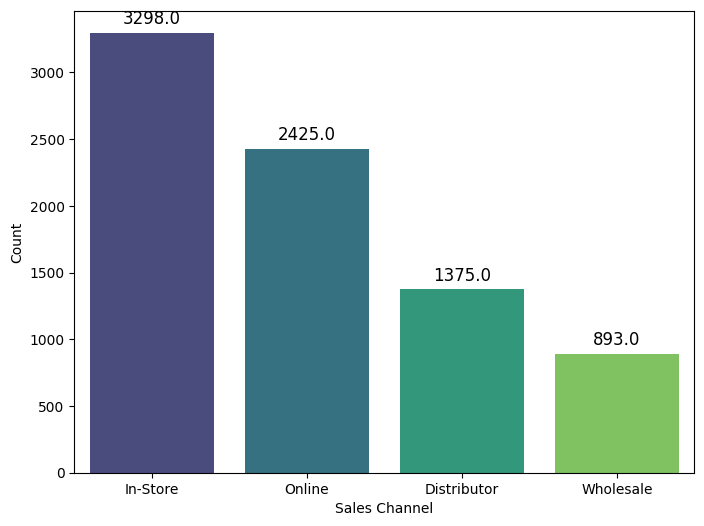

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sales Channel', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.show()

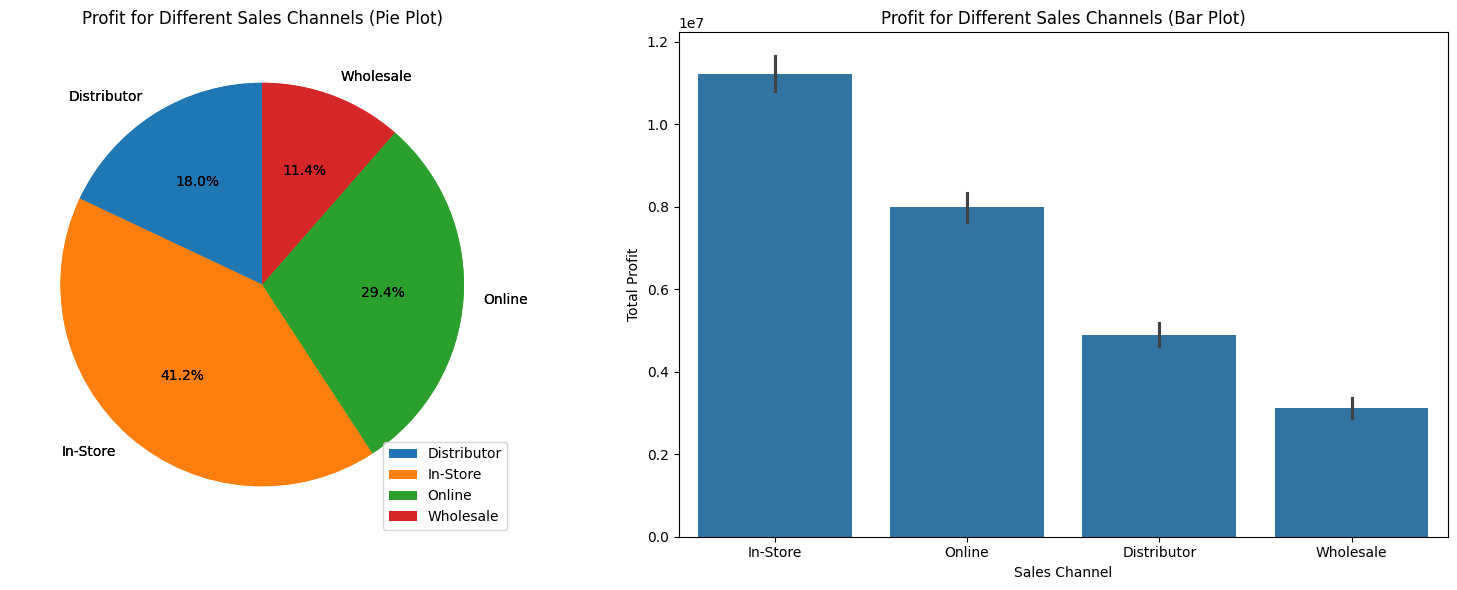

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Profit for Different Sales Channels (Pie Plot)
Profit_by_Channel = df.groupby('Sales Channel')['Profit'].sum()
axes[0].pie(Profit_by_Channel, labels=Profit_by_Channel.index, autopct = '%1.1f%%', startangle = 90)
axes[0].set_title('Profit by Sales Channel')
axes[0].legend(loc='best')



df.groupby('Sales Channel')['Profit'].sum().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Profit for Different Sales Channels (Pie Plot)')
axes[0].set_ylabel('')




#Plotting Profit for Different Sales Channels (Bar Plot)
sns.barplot(x='Sales Channel', y='Profit', data=df, estimator=sum, ax=axes[1])
axes[1].set_title('Profit for Different Sales Channels (Bar Plot)')
axes[1].set_xlabel('Sales Channel')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()

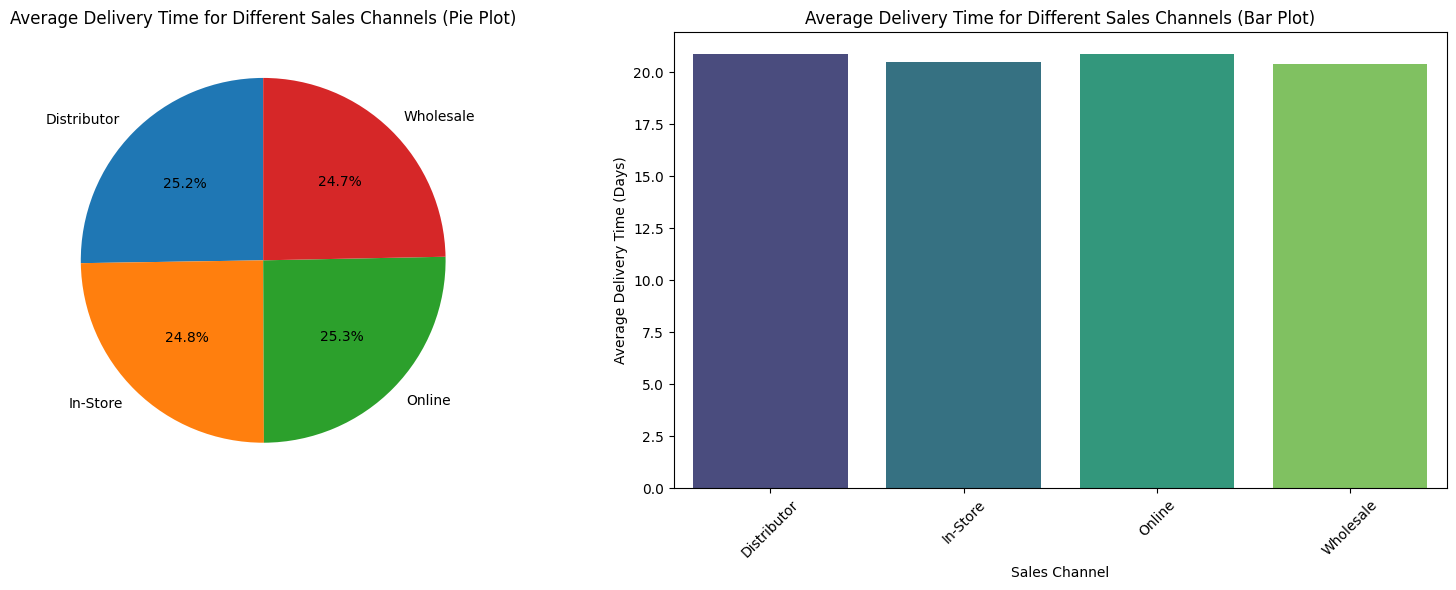

In [17]:
avg_delivery_time = df.groupby('Sales Channel')['Delivery_time'].mean()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Average Delivery Time for Different Sales Channels (Pie Plot)
avg_delivery_time.plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Average Delivery Time for Different Sales Channels (Pie Plot)')
axes[0].set_ylabel('')

# Plotting Average Delivery Time for Different Sales Channels (Bar Plot)
sns.barplot(x=avg_delivery_time.index, y=avg_delivery_time.values, palette='viridis', ax=axes[1])
axes[1].set_title('Average Delivery Time for Different Sales Channels (Bar Plot)')
axes[1].set_xlabel('Sales Channel')
axes[1].set_ylabel('Average Delivery Time (Days)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


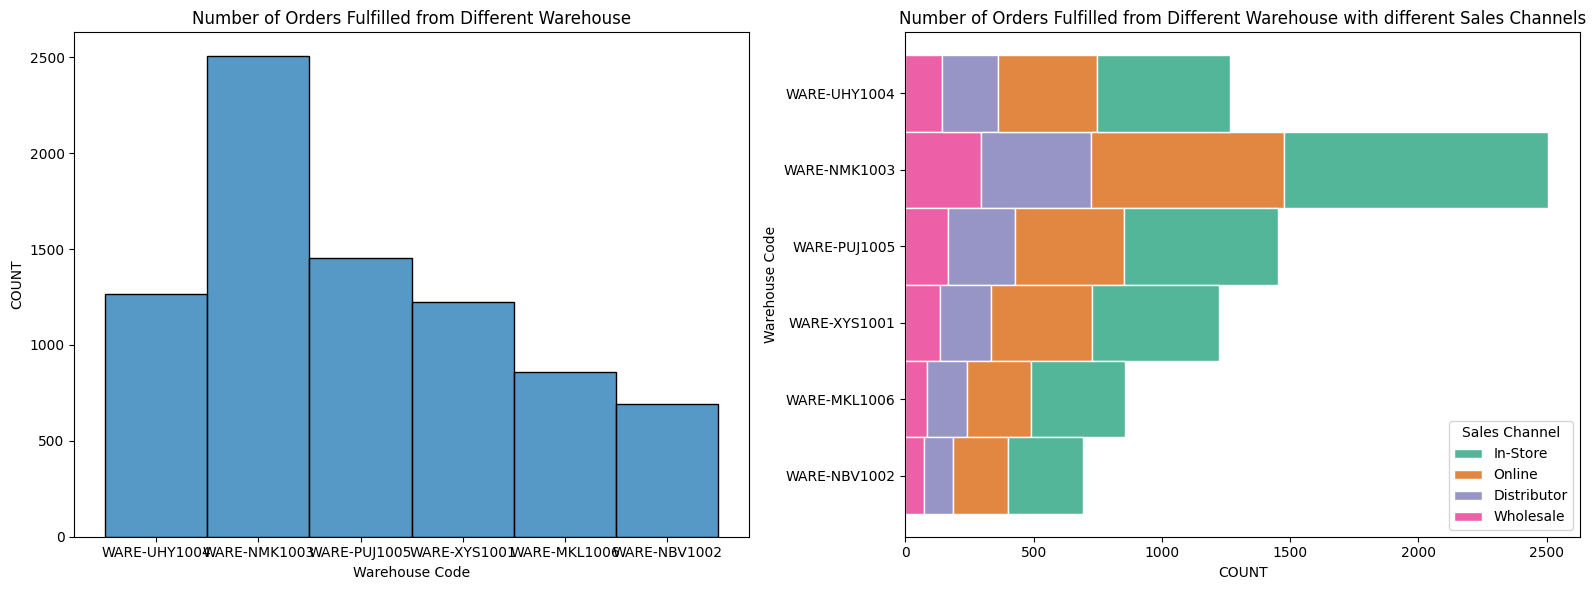

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Number of Orders Fulfilled from Different Warehouse using Seaborn
sns.histplot(data=df, x='WarehouseCode', palette='Dark2', ax=axes[0])
axes[0].set_title('Number of Orders Fulfilled from Different Warehouse')
axes[0].set_xlabel('Warehouse Code')
axes[0].set_ylabel('COUNT')

# Plotting Number of Orders Fulfilled from Different Warehouse using Seaborn (Stacked Bar Plot)
sns.histplot(data=df, y='WarehouseCode', hue='Sales Channel', multiple='stack', palette='Dark2', edgecolor='w', ax=axes[1])
axes[1].set_title('Number of Orders Fulfilled from Different Warehouse with different Sales Channels')
axes[1].set_xlabel('COUNT')
axes[1].set_ylabel('Warehouse Code')


plt.tight_layout()
plt.show()

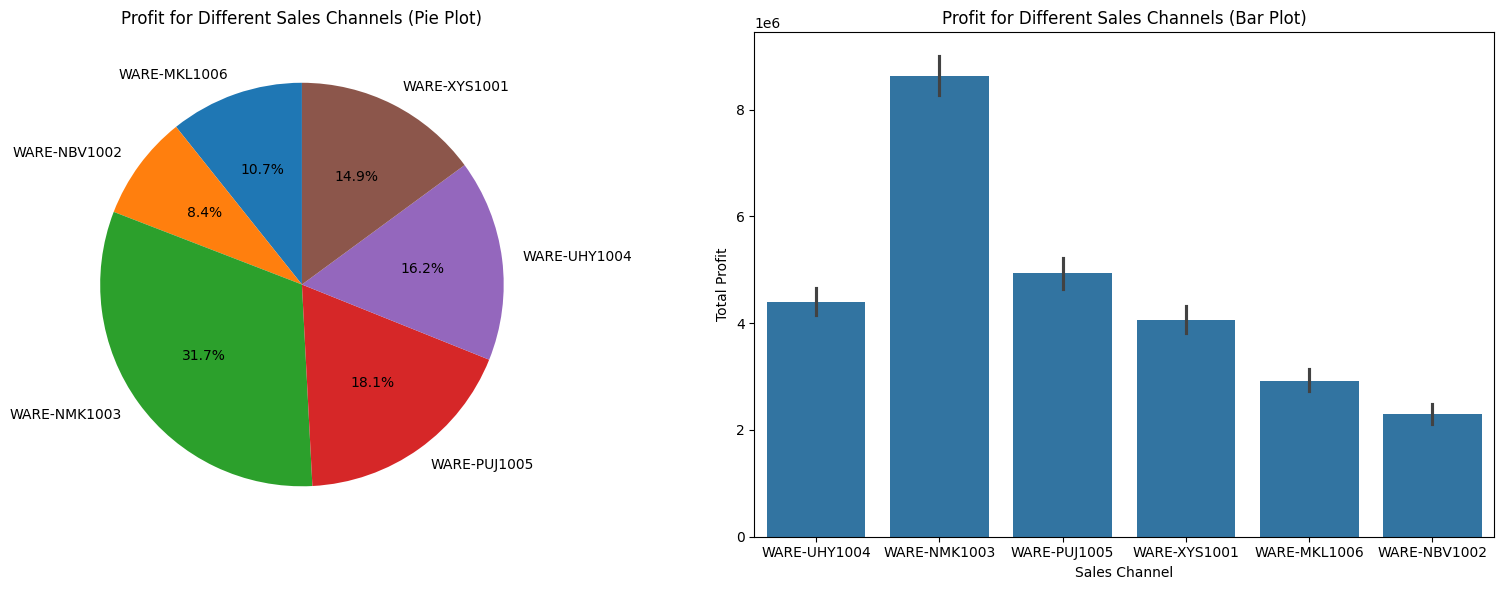

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plotting Profit for Different Sales Channels (Pie Plot)
df.groupby('WarehouseCode')['Profit'].sum().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Profit for Different Sales Channels (Pie Plot)')
axes[0].set_ylabel('')

# Plotting Profit for Different Sales Channels (Bar Plot)
sns.barplot(x='WarehouseCode', y='Profit', data=df, estimator=sum, ax=axes[1])
axes[1].set_title('Profit for Different Sales Channels (Bar Plot)')
axes[1].set_xlabel('Sales Channel')
axes[1].set_ylabel('Total Profit')

plt.tight_layout()
plt.show()


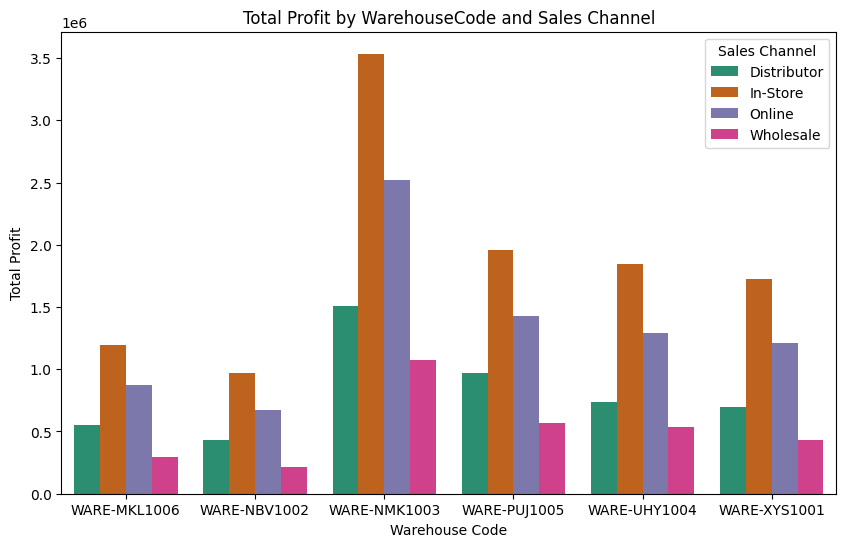

In [20]:
profit_by_category = df.groupby(['WarehouseCode', 'Sales Channel'])['Profit'].sum().reset_index()

# Plotting total profit for each combination using Seaborn (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='WarehouseCode', y='Profit', hue='Sales Channel', data=profit_by_category, palette='Dark2')
plt.title('Total Profit by WarehouseCode and Sales Channel')
plt.xlabel('Warehouse Code')
plt.ylabel('Total Profit')
plt.show()


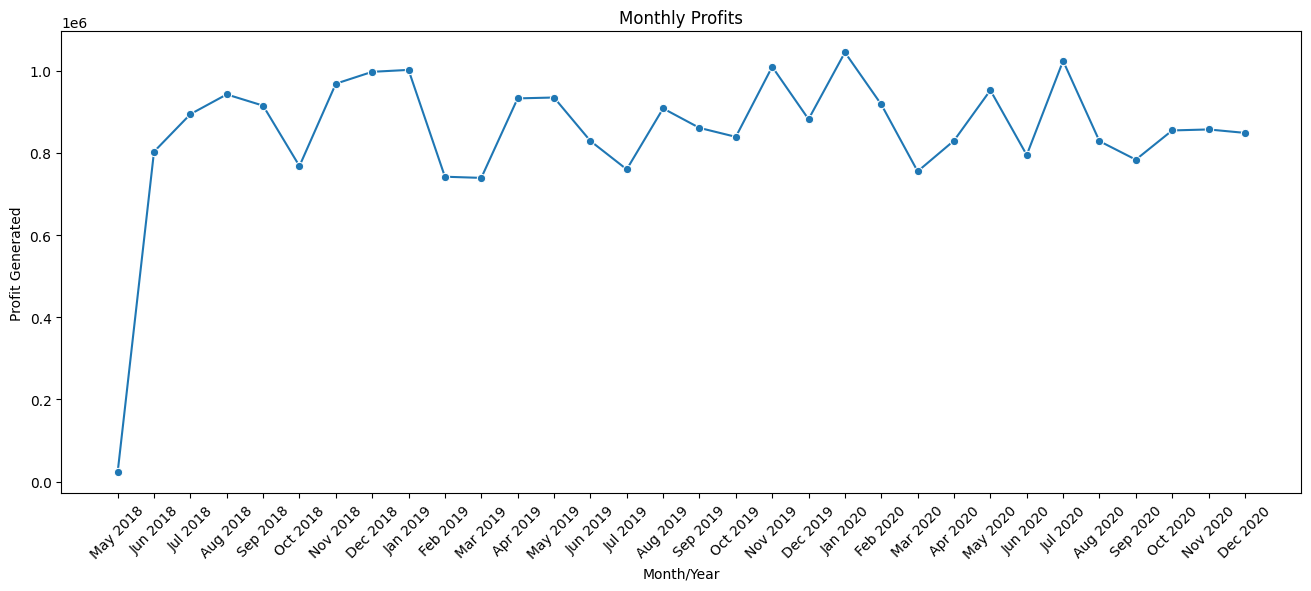

In [21]:
profit_by_month_year = df.groupby([df['OrderDate'].dt.to_period('M')])['Profit'].sum().reset_index()

# Plotting Profit generated per month for each month/year using Seaborn (Line Plot)
plt.figure(figsize=(16, 6))
sns.lineplot(x=profit_by_month_year.index, y='Profit', data=profit_by_month_year, marker='o')

# Format x-axis labels as "Jan 2018", "Feb 2018", etc.
plt.xticks(ticks=profit_by_month_year.index, labels=[date.strftime('%b %Y') for date in profit_by_month_year['OrderDate']], rotation=45)
plt.title('Monthly Profits')
plt.xlabel('Month/Year')
plt.ylabel('Profit Generated')
plt.show()


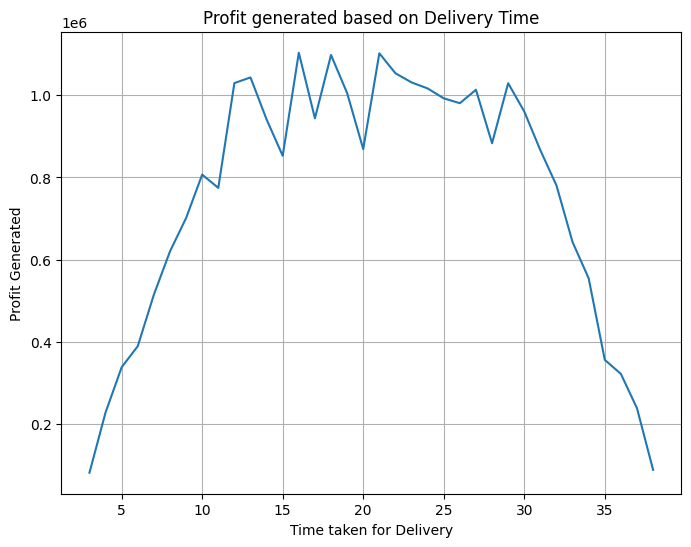

In [22]:
proift_delivery_time=df.groupby('Delivery_time')['Profit'].sum().reset_index()
# Plotting Profit generated based on Delivery Time using Seaborn (Line Plot)
plt.figure(figsize=(8, 6))
sns.lineplot(x='Delivery_time', y='Profit', data=proift_delivery_time)
plt.title('Profit generated based on Delivery Time')
plt.xlabel('Time taken for Delivery')
plt.ylabel('Profit Generated')
plt.grid(True)
plt.show()

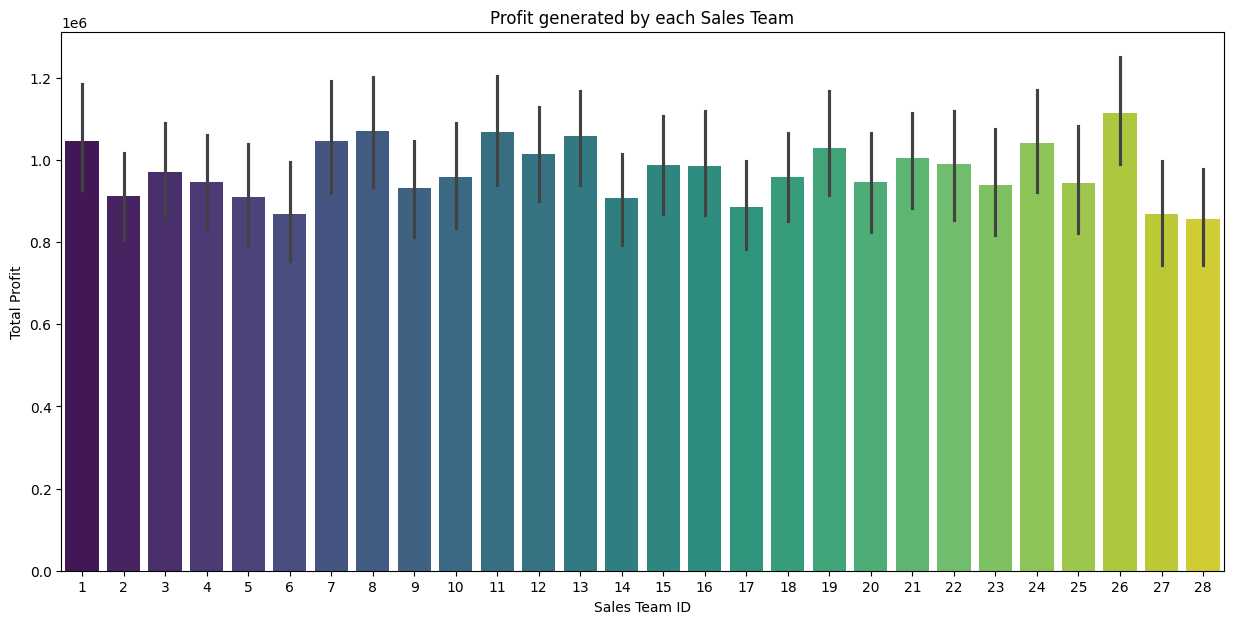

In [23]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='_SalesTeamID', y='Profit', data=df, estimator=sum, palette='viridis')
plt.title('Profit generated by each Sales Team')
plt.xlabel('Sales Team ID')
plt.ylabel('Total Profit')
plt.show()

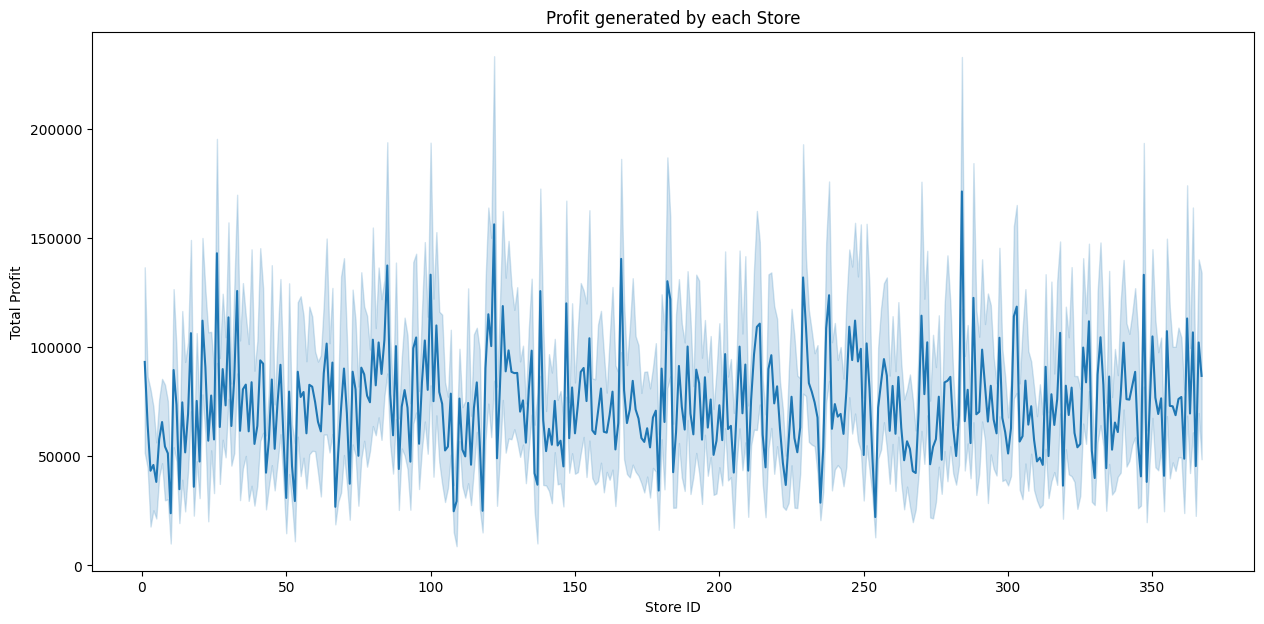

In [24]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x='_StoreID', y='Profit', data=df, estimator=sum)
plt.title('Profit generated by each Store')
plt.xlabel('Store ID')
plt.ylabel('Total Profit')
plt.show()

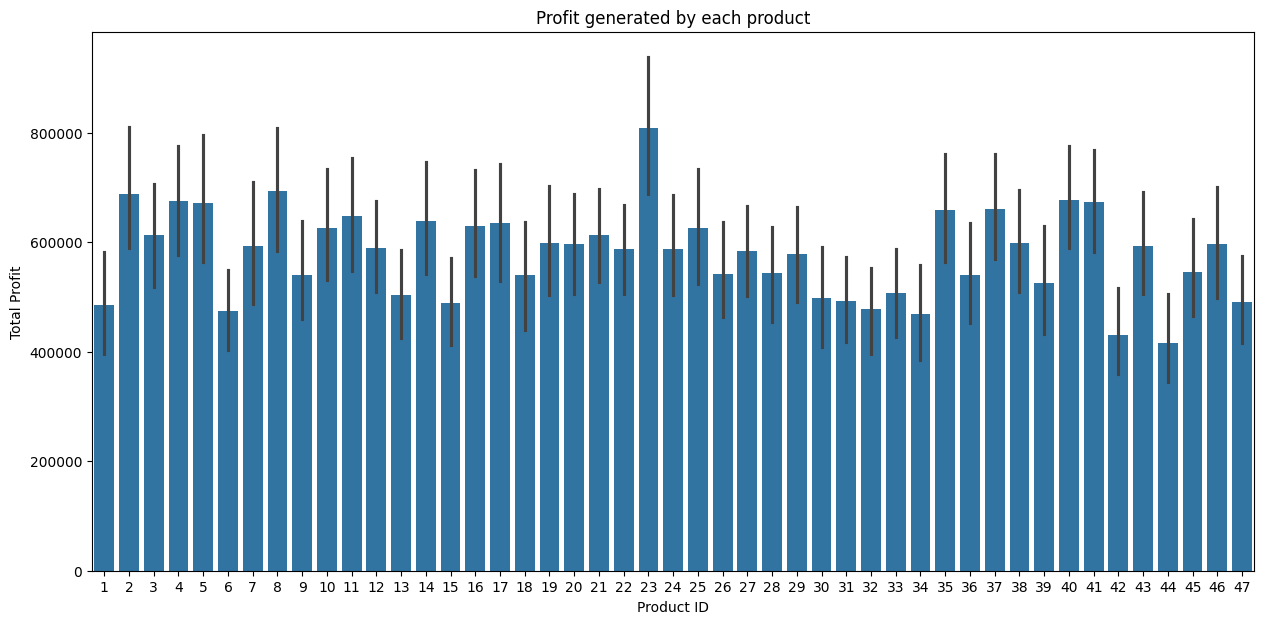

In [25]:
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='_ProductID', y='Profit', data=df, estimator=sum)
plt.title('Profit generated by each product')
plt.xlabel('Product ID')
plt.ylabel('Total Profit')
plt.show()

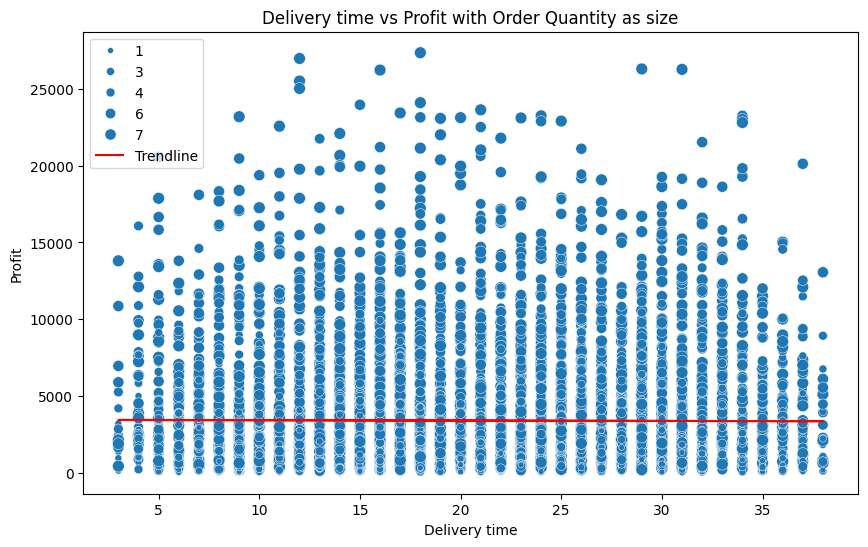

In [26]:
coefficients = np.polyfit(df['Delivery_time'], df['Profit'], 1)
trendline = np.polyval(coefficients, df['Delivery_time'])

# Plotting Delivery time vs Profit with Order Quantity as size using Seaborn (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delivery_time', y='Profit', size='Order Quantity', data=df)
plt.plot(df['Delivery_time'], trendline, color='red', label='Trendline')
plt.title('Delivery time vs Profit with Order Quantity as size')
plt.xlabel('Delivery time')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [27]:
df=df.drop(['OrderNumber','ProcuredDate','OrderDate','ShipDate','DeliveryDate','CurrencyCode'],axis=1)
df.head()

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time,Profit
0,In-Store,WARE-UHY1004,6,15,259,12,5,0.08,1001.18,1963.1,19,4424.83
1,Online,WARE-NMK1003,14,20,196,27,3,0.08,3348.66,3939.6,32,1630.99
2,Distributor,WARE-UHY1004,21,16,213,16,1,0.05,781.22,1775.5,31,944.57
3,Wholesale,WARE-NMK1003,28,48,107,23,8,0.08,1464.69,2324.9,7,6331.15
4,Distributor,WARE-NMK1003,22,49,111,26,8,0.10,1476.14,1822.4,26,2493.07


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7991 entries, 0 to 7990
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sales Channel     7991 non-null   object 
 1   WarehouseCode     7991 non-null   object 
 2   _SalesTeamID      7991 non-null   int64  
 3   _CustomerID       7991 non-null   int64  
 4   _StoreID          7991 non-null   int64  
 5   _ProductID        7991 non-null   int64  
 6   Order Quantity    7991 non-null   int64  
 7   Discount Applied  7991 non-null   float64
 8   Unit Cost         7991 non-null   float64
 9   Unit Price        7991 non-null   float64
 10  Delivery_time     7991 non-null   int64  
 11  Profit            7991 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 749.3+ KB


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sales Channel']= le.fit_transform(df['Sales Channel'])
df['WarehouseCode']= le.fit_transform(df['WarehouseCode'])

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Profit']] = scaler.fit_transform(df[['Profit']])
df[['Unit Cost']] = scaler.fit_transform(df[['Unit Cost']])
df[['Unit Price']] = scaler.fit_transform(df[['Unit Price']])
df.head()

,Sales Channel,WarehouseCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Cost,Unit Price,Delivery_time,Profit
0,1,4,6,15,259,12,5,0.08,-0.387229,-0.192133,19,0.272637
1,2,2,14,20,196,27,3,0.08,1.723162,0.989284,32,-0.478134
2,0,4,21,16,213,16,1,0.05,-0.584974,-0.304267,31,-0.662591
3,3,2,28,48,107,23,8,0.08,0.029468,0.024127,7,0.784909
4,0,2,22,49,111,26,8,0.10,0.039762,-0.276234,26,-0.246473


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(['Profit'], axis = 1)
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, random_state = 42)

In [32]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7191, 11)
Shape of X_test: (800, 11)
Shape of y_train: (7191,)
Shape of y_test: (800,)


In [33]:
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor, Dataset

In [34]:
lgb_params = {
    'n_jobs': -1,
    'random_state': 123
}

# Create and train LGBMRegressor
lgb_model = LGBMRegressor(**lgb_params)

# Train the model
lgb_model.fit(X_train, y_train)

LGBMRegressor
LGBMRegressor(random_state=123)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 7191, number of used features: 11
[LightGBM] [Info] Start training from score 0.000265


LGBMRegressor(random_state=123)

In [35]:
y_pred = lgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R2 score: {r2}")

R2 score: 0.9944052532120707


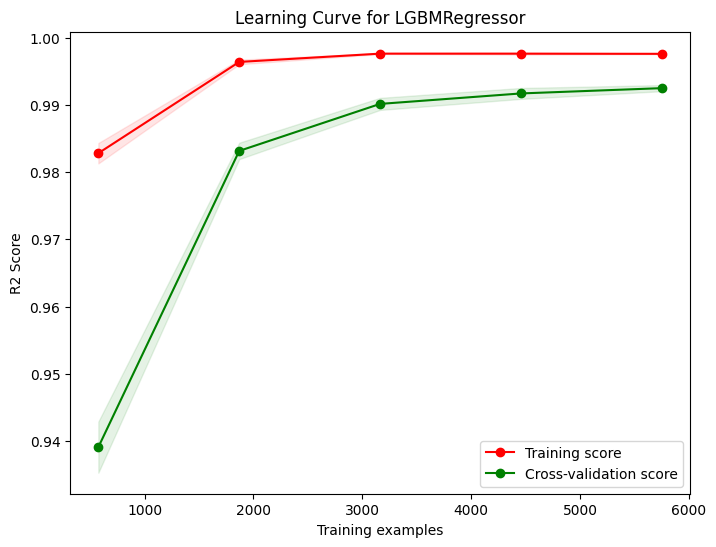

In [36]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lgb_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("R2 Score")
plt.legend(loc="best")
plt.title("Learning Curve for LGBMRegressor")
plt.show()

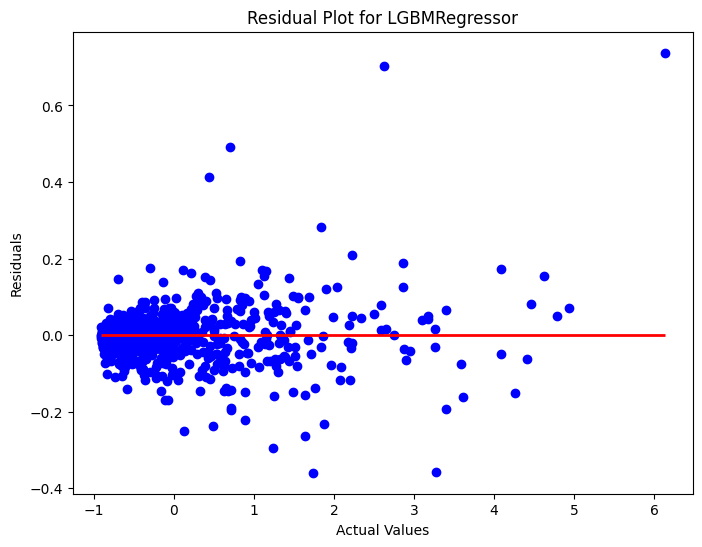

In [37]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_test), xmax=max(y_test), color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for LGBMRegressor')
plt.show()